# Running Regression Model

## Exploratory Data Analysis and Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("Life Expectancy.csv",sep=r'\s*,\s*',engine='python')

In [3]:
# The Y variable is the average life span in a country. Indicator variables are various factors of a country like GDP, Avg BMI,etc.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   int64  
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [4]:
train.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
train.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
train.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                      int64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [7]:
# Plotting a correlation matrix
corr=train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.036464,-0.049175,0.032723,0.105898,-0.081840,0.104668,-0.041980,0.094498,0.087309,0.134817,-0.138789,0.102707,0.017199,-0.045082,-0.048152,0.242953,0.213265
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.036464,-0.196557,0.078756,1.000000,-0.116647,-0.085906,-0.224750,0.501038,-0.227480,0.996628,-0.171063,-0.128826,-0.175539,0.024955,-0.108643,0.556781,0.465700,0.471340,-0.145018,-0.195202
Alcohol,-0.049175,0.404877,-0.195848,-0.116647,1.000000,0.341112,0.086217,-0.052569,0.338253,-0.113388,0.222057,0.302902,0.222378,-0.049918,0.354406,-0.035376,-0.432302,-0.420862,0.450254,0.548001
percentage expenditure,0.032723,0.381864,-0.242860,-0.085906,0.341112,1.000000,0.016704,-0.056831,0.231130,-0.088152,0.147664,0.176245,0.144022,-0.098230,0.899370,-0.025716,-0.252397,-0.253931,0.382244,0.391466
Hepatitis B,0.105898,0.256762,-0.162476,-0.224750,0.086217,0.016704,1.000000,-0.121211,0.155174,-0.234353,0.483989,0.070983,0.610199,-0.113395,0.083918,-0.123834,-0.122479,-0.127039,0.199141,0.222895
Measles,-0.081840,-0.157586,0.031176,0.501038,-0.052569,-0.056831,-0.121211,1.000000,-0.176069,0.507718,-0.136460,-0.106405,-0.142174,0.030673,-0.076646,0.265936,0.224579,0.220836,-0.129465,-0.138344
BMI,0.104668,0.567694,-0.387017,-0.227480,0.338253,0.231130,0.155174,-0.176069,1.000000,-0.237910,0.287579,0.238765,0.286077,-0.243735,0.304442,-0.072051,-0.530805,-0.537784,0.509299,0.558363
under-five deaths,-0.041980,-0.222529,0.094146,0.996628,-0.113388,-0.088152,-0.234353,0.507718,-0.237910,1.000000,-0.189137,-0.130355,-0.196083,0.037783,-0.112302,0.544401,0.467771,0.472244,-0.163185,-0.210945


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12BF6568>,
      dtype=object)

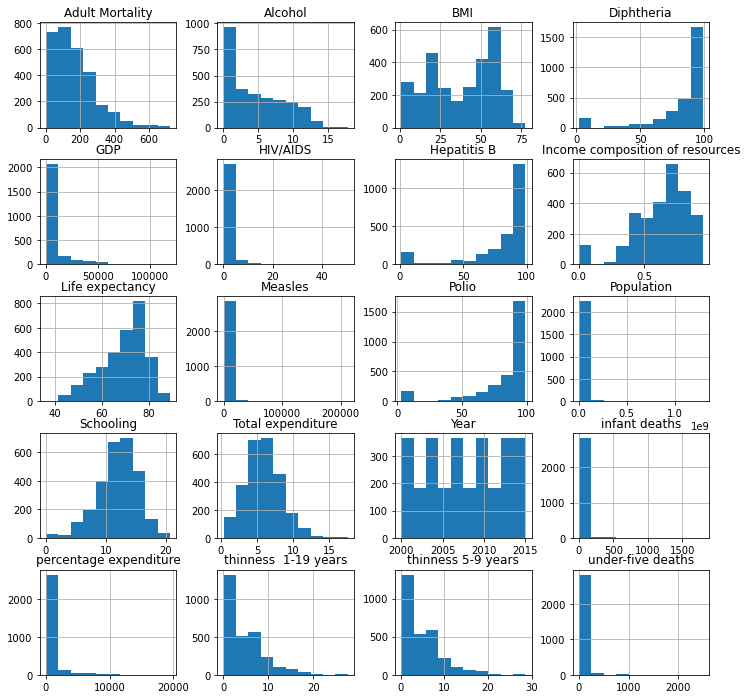

In [8]:
# Plotting histograms
histogram1 = train.hist(bins=10,figsize=(12,12))
histogram1

### Checking for null values in train dataset

In [9]:
# Checking for null values in train dataset
train.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
BMI                                 True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
HIV/AIDS                           False
GDP                                 True
Population                          True
thinness  1-19 years                True
thinness 5-9 years                  True
Income composition of resources     True
Schooling                           True
dtype: bool

In [10]:
# Checking the percentage of missing data in train data
train.isna().sum()/train.shape[0]

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.065915
percentage expenditure             0.000000
Hepatitis B                        0.188866
Measles                            0.000000
BMI                                0.010929
under-five deaths                  0.000000
Polio                              0.006489
Total expenditure                  0.077186
Diphtheria                         0.006489
HIV/AIDS                           0.000000
GDP                                0.151298
Population                         0.219945
thinness  1-19 years               0.010929
thinness 5-9 years                 0.010929
Income composition of resources    0.054645
Schooling                          0.054645
dtype: float64

### Data Imputation

#### Column : Adult Mortality

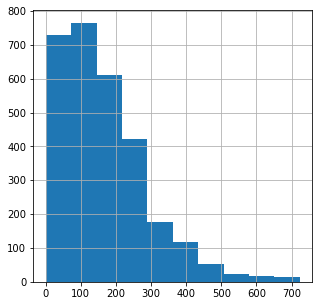

In [11]:
histogram = train["Adult Mortality"].hist(bins=10,figsize=(5,5))
histogram

In [12]:
# Since we observed in the graph above, Adult Mortality follows a skewed distribution, we will fillna with median
#train['Adult Mortality']=train['Adult Mortality'].fillna((train['Adult Mortality'].median()))
#train['Adult Mortality'] = train['Adult Mortality'].fillna(train.groupby('Country')['Adult Mortality'].median())
#train['Adult Mortality'] = train['Adult Mortality'].fillna(x)


In [13]:
x = train.groupby('Country')['Adult Mortality'].median()

for i in range(len(train)):
    if pd.isna(train['Adult Mortality'].iloc[i]):
        country = train['Country'].iloc[i]
        train['Adult Mortality'] = x[country]
    

In [14]:
x['Angola']

367.0

In [15]:
train['Adult Mortality'].isna().any()

False

#### Column : Alcohol

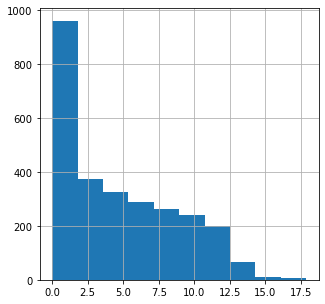

In [16]:
histogram = train["Alcohol"].hist(bins=10,figsize=(5,5))
histogram

In [17]:
# Since we observed in the graph above, Alcohol follows a skewed distribution, we will fillna with median
#train['Alcohol']=train['Alcohol'].fillna((train['Alcohol'].median()))
#train['Alcohol'] = train['Alcohol'].fillna(train.groupby('Country')['Alcohol'].transform('median'))

In [18]:
x = train.groupby('Country')['Alcohol'].median()

for i in range(len(train)):
    if pd.isna(train['Alcohol'].iloc[i]):
        country = train['Country'].iloc[i]
        train['Alcohol'] = x[country]
    

#### Column : Hepatitis B

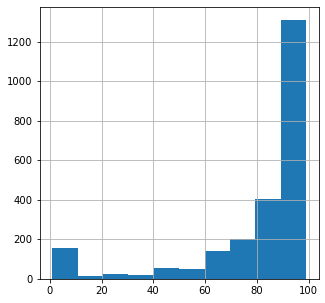

In [19]:
histogram = train["Hepatitis B"].hist(bins=10,figsize=(5,5))
histogram

In [20]:
# Since we observed in the graph above, Hepatitis B follows a skewed distribution, we will fillna with median
# train['Hepatitis B']=train['Hepatitis B'].fillna((train['Hepatitis B'].median()))

In [21]:
x = train.groupby('Country')['Hepatitis B'].median()

for i in range(len(train)):
    if pd.isna(train['Hepatitis B'].iloc[i]):
        country = train['Country'].iloc[i]
        train['Hepatitis B'] = x[country]
    

#### Column : BMI

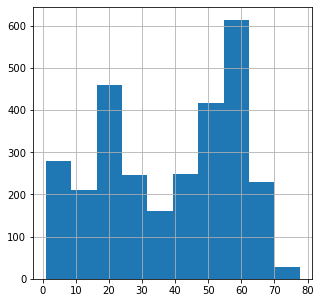

In [22]:
histogram = train["BMI"].hist(bins=10,figsize=(5,5))
histogram

In [23]:
# Since we observed in the graph above, BMI follows a skewed distribution, we will fillna with median
# train['BMI']=train['BMI'].fillna((train['BMI'].median()))

In [24]:
x = train.groupby('Country')['BMI'].mean()

for i in range(len(train)):
    if pd.isna(train['BMI'].iloc[i]):
        country = train['Country'].iloc[i]
        train['BMI'] = x[country]

#### Column : Polio

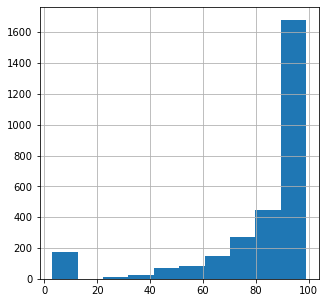

In [25]:
histogram = train["Polio"].hist(bins=10,figsize=(5,5))
histogram

In [26]:
# Since we observed in the graph above, Polio follows a skewed distribution, we will fillna with median
# train['Polio']=train['Polio'].fillna((train['Polio'].median()))

In [27]:
x = train.groupby('Country')['Polio'].median()

for i in range(len(train)):
    if pd.isna(train['Polio'].iloc[i]):
        country = train['Country'].iloc[i]
        train['Polio'] = x[country]

#### Column : Total expenditure

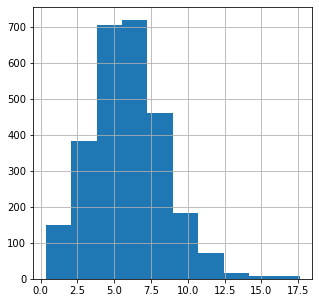

In [28]:
histogram = train["Total expenditure"].hist(bins=10,figsize=(5,5))
histogram

In [29]:
# Since we observed in the graph above, Total expenditure follows a normal distribution, we will fillna with mean
# train['Total expenditure']=train['Total expenditure'].fillna((train['Total expenditure'].mean()))

In [30]:
x = train.groupby('Country')['Total expenditure'].median()

for i in range(len(train)):
    if pd.isna(train['Total expenditure'].iloc[i]):
        country = train['Country'].iloc[i]
        train['Total expenditure'] = x[country]

#### Column : Diphtheria

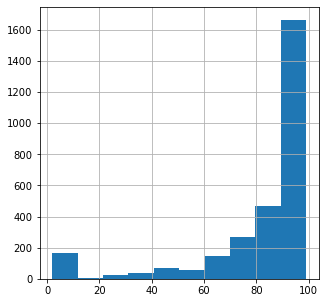

In [31]:
histogram = train["Diphtheria"].hist(bins=10,figsize=(5,5))
histogram

In [32]:
# Since we observed in the graph above, Diptheria follows a skewed distribution, we will fillna with median
# train['Diphtheria']=train['Diphtheria'].fillna((train['Diphtheria'].median()))

In [33]:
x = train.groupby('Country')['Diphtheria'].median()

for i in range(len(train)):
    if pd.isna(train['Diphtheria'].iloc[i]):
        country = train['Country'].iloc[i]
        train['Diphtheria'] = x[country]

#### Column : GDP

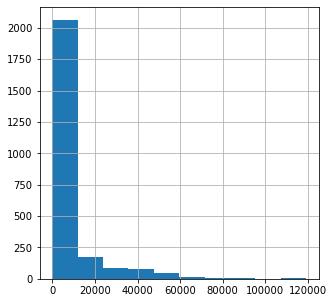

In [34]:
histogram = train["GDP"].hist(bins=10,figsize=(5,5))
histogram

In [35]:
# Since we observed in the graph above, GDP follows a skewed distribution, we will fillna with median
# train['GDP']=train['GDP'].fillna((train['GDP'].median()))

In [36]:
x = train.groupby('Country')['GDP'].median()

for i in range(len(train)):
    if pd.isna(train['GDP'].iloc[i]):
        country = train['Country'].iloc[i]
        train['GDP'] = x[country]

#### Column : Population

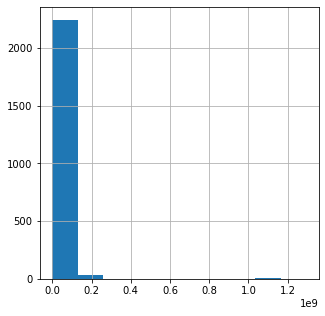

In [37]:
histogram = train["Population"].hist(bins=10,figsize=(5,5))
histogram

In [38]:
# Since we observed in the graph above, Population follows a skewed distribution, we will fillna with median
# train['Population']=train['Population'].fillna((train['Population'].median()))

In [39]:
x = train.groupby('Country')['Population'].median()

for i in range(len(train)):
    if pd.isna(train['Population'].iloc[i]):
        country = train['Country'].iloc[i]
        train['Population'] = x[country]

#### Column : thinness 5-9 years

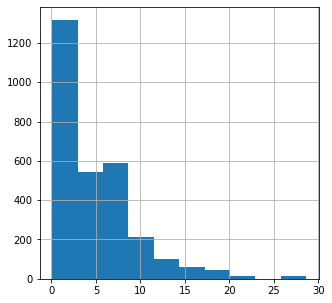

In [40]:
histogram = train["thinness 5-9 years"].hist(bins=10,figsize=(5,5))
histogram

In [41]:
# Since we observed in the graph above, thinness 5-9 years follows a skewed distribution, we will fillna with median
# train['thinness 5-9 years']=train['thinness 5-9 years'].fillna((train['thinness 5-9 years'].median()))

In [42]:
x = train.groupby('Country')['thinness 5-9 years'].median()

for i in range(len(train)):
    if pd.isna(train['thinness 5-9 years'].iloc[i]):
        country = train['Country'].iloc[i]
        train['thinness 5-9 years'] = x[country]

#### Column : Income composition of resources

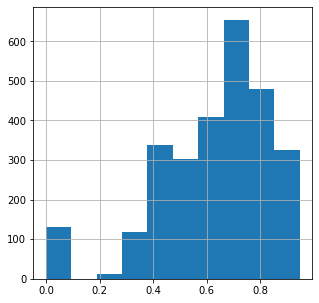

In [43]:
histogram = train["Income composition of resources"].hist(bins=10,figsize=(5,5))
histogram

In [44]:
# Since we observed in the graph above, Income composition of resources follows a skewed distribution, we will fillna with median
# train['Income composition of resources']=train['Income composition of resources'].fillna((train['Income composition of resources'].median()))

In [45]:
x = train.groupby('Country')['Income composition of resources'].median()

for i in range(len(train)):
    if pd.isna(train['Income composition of resources'].iloc[i]):
        country = train['Country'].iloc[i]
        train['Income composition of resources'] = x[country]

#### Column : Schooling

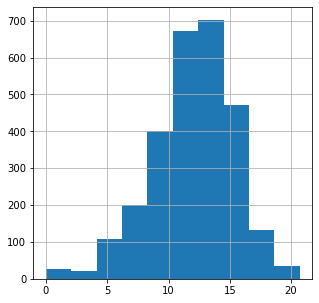

In [46]:
histogram = train["Schooling"].hist(bins=10,figsize=(5,5))
histogram

In [47]:
# Since we observed in the graph above, Schooling follows a normal distribution, we will fillna with median
# train['Schooling']=train['Schooling'].fillna((train['Schooling'].median()))

In [48]:
x = train.groupby('Country')['Schooling'].mean()

for i in range(len(train)):
    if pd.isna(train['Schooling'].iloc[i]):
        country = train['Country'].iloc[i]
        train['Schooling'] = x[country]

#### Column : thinness  1-19 years

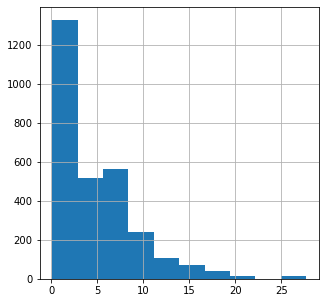

In [49]:
histogram = train["thinness  1-19 years"].hist(bins=10,figsize=(5,5))
histogram

In [50]:
x = train.groupby('Country')['thinness  1-19 years'].median()

for i in range(len(train)):
    if pd.isna(train['thinness  1-19 years'].iloc[i]):
        country = train['Country'].iloc[i]
        train['thinness  1-19 years'] = x[country]

In [51]:
train.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

### Handling Categorical Variables

#### Column : Year

In [52]:
# Finding the number of unique entries in the year column
uc=train['Year'].unique()
print(uc)

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]


In [53]:
# We will use one hot encoding method to convert the categorical data to numerical values in the dataset
year=pd.get_dummies(train['Year'],columns='Year',prefix='Year')
year

,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2924,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2925,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2926,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
train = train.dropna(subset=['Life expectancy'],how='any')

In [55]:
train=pd.concat([train, year], axis=1)
train.drop(['Year'],axis=1,inplace= True)

#### Column : Status

In [56]:
# Finding the number of unique entries in the Status column
train['Status'].unique()


array(['Developing', 'Developed'], dtype=object)

In [57]:
# Since there are only two unique values, we will convert this column into a 0/1 column
train['Status'] = train['Status'].map({'Developing':0,'Developed':1}).astype(int)

In [58]:
# Checking the shape of the two datasets
train.shape

(2928, 37)

# Machine Learning Model

## Splitting the dataset into train and test, Scaling the dataset

In [59]:
X = train.drop(["Life expectancy","Country"],axis=1)
y = train['Life expectancy']
X.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,0,263,62,0.45,71.279624,94.5,1154,58.66875,83,92.5,...,0,0,0,0,0,0,0,0,0,1
1,0,271,64,0.45,73.523582,94.5,492,58.66875,86,92.5,...,0,0,0,0,0,0,0,0,1,0
2,0,268,66,0.45,73.219243,94.5,430,58.66875,89,92.5,...,0,0,0,0,0,0,0,1,0,0
3,0,272,69,0.45,78.184215,94.5,2787,58.66875,93,92.5,...,0,0,0,0,0,0,1,0,0,0
4,0,275,71,0.45,7.097109,94.5,3013,58.66875,97,92.5,...,0,0,0,0,0,1,0,0,0,0


In [60]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2923    44.3
2924    44.5
2925    44.8
2926    45.3
2927    46.0
Name: Life expectancy, Length: 2928, dtype: float64

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## K Neighbors Regressor

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_neighbours = { 'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [63]:
Grid_KNN = GridSearchCV(KNeighborsRegressor(),knn_neighbours,cv=10,return_train_score=True)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [64]:
# Finding out the best parameters for the model

print("Best cross-validation score for the model is: {:.4f}".format(Grid_KNN.best_score_))
print('Best parameters are: ', Grid_KNN.best_params_)
print('Best estimator is: ', Grid_KNN.best_estimator_)

Best cross-validation score for the model is: 0.8375
Best parameters are:  {'n_neighbors': 4}
Best estimator is:  KNeighborsRegressor(n_neighbors=4)


In [65]:
# Reporting the training and testing scores for the best model

print("The train score is: {:.4f} ".format(Grid_KNN.score(X_train, y_train)))
print("The test score is: {:.4f} ".format(Grid_KNN.score(X_test, y_test)))

The train score is: 0.9126 
The test score is: 0.8516 


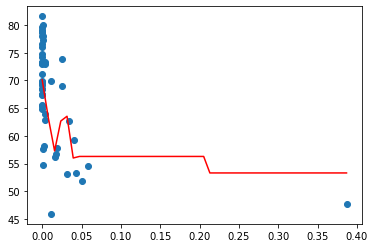

In [66]:
#BMI and Life Expectancy
X_b = X_train[:50,8].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

## Linear Regression using Normal Equation

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)
score = cross_val_score(lreg,X_train,y_train,cv=10)
print("The Best cross validation score is: {:.4f} ".format(score.mean()))
print("{:.4f}".format(lreg.score(X_train, y_train)))
print("{:.4f}".format(lreg.score(X_test, y_test)))

The Best cross validation score is: 0.6788 
0.6933
0.6640


Text(0.5, 0, 'RM')

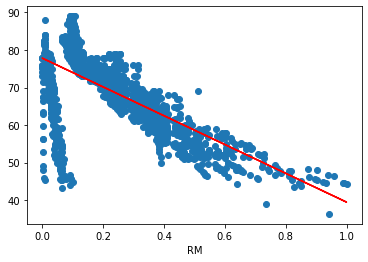

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,1].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

## Ridge Regression

In [69]:
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge

param_grid = {'alpha':[0.001,0.01, 0.1, 1, 10, 100,1000]}

In [70]:
Grid_Ridge = GridSearchCV(Ridge(),param_grid,cv=10,return_train_score=True)
Grid_Ridge.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [71]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_Ridge.best_score_))
print('Best Paramater:',Grid_Ridge.best_params_)

Best Cross-Validation Score: 0.6790
Best Paramater: {'alpha': 0.001}


In [72]:
# Reporting the training and testing scores for the best model

print("Best Training score: {:.4f}".format(Grid_Ridge.score(X_train,y_train)))
print("Best Testing score: {:.4f}".format(Grid_Ridge.score(X_test,y_test)))

Best Training score: 0.6933
Best Testing score: 0.6644


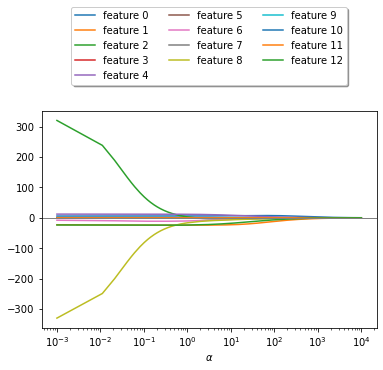

In [73]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Lasso Regression

In [74]:
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Lasso

param_grid = {'alpha':[0.001,0.01, 0.1, 1, 10, 100,1000]}

In [75]:
Grid_Lasso = GridSearchCV(Lasso(),param_grid,cv=10,return_train_score=True)
Grid_Lasso.fit(X_train,y_train)

c:\users\rajas\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.774375464461627, tolerance: 17.643138605263157
  model = cd_fast.enet_coordinate_descent(
c:\users\rajas\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.180701786186546, tolerance: 18.0092327368421
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [76]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_Lasso.best_score_))
print('Best Paramater:',Grid_Lasso.best_params_)

Best Cross-Validation Score: 0.6784
Best Paramater: {'alpha': 0.001}


In [77]:
# Reporting the training and testing scores for the best model

print("Best Training score: {:.4f}".format(Grid_Lasso.score(X_train,y_train)))
print("Best Testing score: {:.4f}".format(Grid_Lasso.score(X_test,y_test)))

Best Training score: 0.6917
Best Testing score: 0.6660


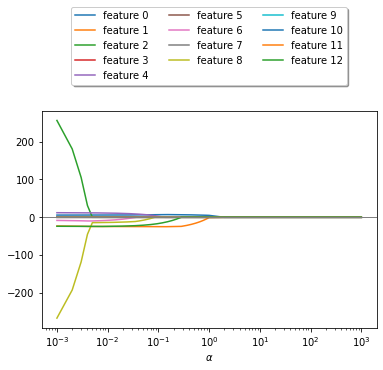

In [78]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Polynomial Regression

In [79]:
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid = {'polynomialfeatures__degree':[1,2,3]}

In [80]:
pipeline = make_pipeline(PolynomialFeatures(),LinearRegression())

In [81]:
Grid_Poly = GridSearchCV(pipeline,param_grid,cv=10,return_train_score=True)
Grid_Poly.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3]},
             return_train_score=True)

In [82]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_Poly.best_score_))
print('Best Paramater:',Grid_Poly.best_params_)

Best Cross-Validation Score: 0.7170
Best Paramater: {'polynomialfeatures__degree': 2}


In [83]:
# Reporting the training and testing scores for the best model

print("Best Training score: {:.4f}".format(Grid_Poly.score(X_train,y_train)))
print("Best Testing score: {:.4f}".format(Grid_Poly.score(X_test,y_test)))

Best Training score: 0.8537
Best Testing score: 0.7423


## Linear SVM

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'tol':[1]}

Grid_LSVC = GridSearchCV(LinearSVR(), param_grid, cv=10, return_train_score=True,scoring='r2')
Grid_LSVC.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'tol': [1]},
             return_train_score=True, scoring='r2')

In [85]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_LSVC.best_score_))
print('Best Paramater:',Grid_LSVC.best_params_)

Best Cross-Validation Score: 0.5395
Best Paramater: {'C': 1, 'tol': 1}


In [86]:
# Reporting the training and testing scores for the best model

print("Best Training score :{:.4f}".format(Grid_LSVC.score(X_train,y_train)))
print("Best Testing score: {:.4f}".format(Grid_LSVC.score(X_test,y_test)))

Best Training score :0.6087
Best Testing score: 0.5819


## SVM with Linear Kernel

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [88]:
Grid_LK = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv=10, return_train_score=True)
Grid_LK.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [89]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_LK.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_LK.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.6058


In [90]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_LK.score(X_train,y_train)))
print("Best testing score: {:.4f}".format(Grid_LK.score(X_test,y_test)))

Best training score: 0.6201
Best testing score: 0.6223


## SVM with Poly Kernel

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [92]:
Grid_PK = GridSearchCV(SVR(kernel = 'poly'), param_grid, cv=10, return_train_score=True)
Grid_PK.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [93]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_PK.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_PK.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.6661


In [94]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_PK.score(X_train,y_train)))
print("Best testing score: {:.4f}".format(Grid_PK.score(X_test,y_test)))

Best training score: 0.7093
Best testing score: 0.6825


## SVM with RBF Kernel

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [96]:
Grid_RK = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv=10, return_train_score=True)
Grid_RK.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [97]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_RK.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_RK.best_score_))

Best parameters: {'C': 100, 'gamma': 10}
Best cross-validation score: 0.7998


In [98]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_RK.score(X_train,y_train)))
print("Best testing score: {:.4f}".format(Grid_RK.score(X_test,y_test)))

Best training score: 0.9047
Best testing score: 0.8164


## Decision Tree Regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {"max_leaf_nodes": range(2,6),
              "min_samples_split": range(2,10,1),
              "max_depth": [1,2,3,4]
           }

In [100]:
dreg = DecisionTreeRegressor(random_state=0)
Grid_dtree = GridSearchCV(dreg, param_grid, cv=10, return_train_score = True)
Grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_leaf_nodes': range(2, 6),
                         'min_samples_split': range(2, 10)},
             return_train_score=True)

In [101]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_dtree.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_dtree.best_score_))

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_split': 2}
Best cross-validation score: 0.7577


In [102]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_dtree.score(X_train,y_train)))
print("Best testing score: {:.4f}".format(Grid_dtree.score(X_test,y_test)))

Best training score: 0.7642
Best testing score: 0.7501


## SGD Regressor

In [103]:
from sklearn.linear_model import SGDRegressor

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1','l2'],
              'eta0':[0.01,0.05,0.1,0.5]}

In [104]:
Grid_SGD = GridSearchCV(SGDRegressor(max_iter=1000, tol=1e-3),param_grid,cv=10,return_train_score=True)
Grid_SGD.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SGDRegressor(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'eta0': [0.01, 0.05, 0.1, 0.5],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

In [105]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_SGD.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_SGD.best_score_))

Best parameters: {'alpha': 0.001, 'eta0': 0.1, 'penalty': 'l1'}
Best cross-validation score: 0.6456


In [106]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_SGD.score(X_train,y_train)))
print("Best testing score: {:.4f}".format(Grid_SGD.score(X_test,y_test)))

Best training score: 0.6584
Best testing score: 0.6371


### We conclude that the best model for our dataset will be KNN Regressor, which gave the highest crossvalidation score: 0.83, highest training score: 0.91 and highest test score: 0.85. Best n = 4

In [111]:
from sklearn.svm import SVR

final_model = KNeighborsRegressor(4)
final_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [112]:
print("Best training score: {:.4f}".format(final_model.score(X_train,y_train)))
print("Best testing score: {:.4f}".format(final_model.score(X_test,y_test)))

Best training score: 0.9126
Best testing score: 0.8516


In [113]:
final_prediction = final_model.predict(X_test)

In [114]:
final_prediction

array([65.05 , 59.975, 49.375, 73.2  , 67.425, 70.55 , 58.275, 66.475,
       71.375, 72.975, 73.625, 73.65 , 68.75 , 70.55 , 76.975, 61.625,
       70.525, 66.525, 57.9  , 69.15 , 64.55 , 63.1  , 76.675, 67.1  ,
       73.525, 73.8  , 60.625, 71.5  , 74.4  , 57.6  , 66.55 , 80.325,
       73.85 , 66.775, 55.55 , 67.7  , 53.775, 69.3  , 73.   , 72.95 ,
       53.475, 73.725, 79.8  , 55.75 , 72.875, 72.7  , 74.45 , 49.25 ,
       78.95 , 76.85 , 77.725, 65.4  , 76.225, 63.325, 62.775, 78.6  ,
       65.575, 73.975, 58.875, 68.325, 82.3  , 81.025, 64.425, 73.9  ,
       72.725, 55.025, 58.725, 71.425, 64.25 , 81.625, 73.725, 75.425,
       64.75 , 74.675, 73.575, 66.45 , 58.4  , 65.325, 80.3  , 70.2  ,
       84.15 , 74.4  , 71.   , 56.275, 70.45 , 68.425, 78.925, 56.325,
       74.425, 53.05 , 65.15 , 74.575, 75.9  , 75.7  , 62.85 , 72.775,
       67.425, 54.25 , 69.2  , 52.625, 69.575, 73.7  , 66.45 , 75.425,
       82.075, 66.95 , 65.55 , 55.125, 73.325, 74.875, 56.75 , 75.1  ,
      